#### Here are the steps I'll try to follow:
- 1. Data Cleaning & Preparation:
    - import libraries and read the data
    - handle categorical and numerical variables by creating dummies
    - handle missing values by imputing them with most relevant values or removing data all-together if nulls exceed a limit
- 2. Create the train-test split and perform scaling
- 3. Model building:
    - Use PCA to reduce features
    - Run a Logistic Regression on the features and check some measures
    - Run a Decision Tree/Random Forest algo to see if we get better results using DT compared to Logit
    - Compare both models using some score
- 4. Model Evaluation:
    - check for accuracy
    - sensitivity and specificity check
    - precision and recall check
- 5. Prediction on the test data set

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# let's read the data
df = pd.read_csv("telecom_churn_data.csv")

In [3]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
# looking at the overall shape
df.shape

(99999, 226)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
# look at data statistics
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [7]:
# let's create a backup of data
df_copy = df.copy()

In [8]:
# Looking for missing values in the data

pct_nul = df.isnull().sum()/ df.shape[0]

pct_nul = pd.DataFrame(pct_nul)

print(round(100*(pct_nul.head(50)),2))

print(round(100*(pct_nul.tail(50)),2))

                         0
mobile_number         0.00
circle_id             0.00
loc_og_t2o_mou        1.02
std_og_t2o_mou        1.02
loc_ic_t2o_mou        1.02
last_date_of_month_6  0.00
last_date_of_month_7  0.60
last_date_of_month_8  1.10
last_date_of_month_9  1.66
arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
arpu_9                0.00
onnet_mou_6           3.94
onnet_mou_7           3.86
onnet_mou_8           5.38
onnet_mou_9           7.75
offnet_mou_6          3.94
offnet_mou_7          3.86
offnet_mou_8          5.38
offnet_mou_9          7.75
roam_ic_mou_6         3.94
roam_ic_mou_7         3.86
roam_ic_mou_8         5.38
roam_ic_mou_9         7.75
roam_og_mou_6         3.94
roam_og_mou_7         3.86
roam_og_mou_8         5.38
roam_og_mou_9         7.75
loc_og_t2t_mou_6      3.94
loc_og_t2t_mou_7      3.86
loc_og_t2t_mou_8      5.38
loc_og_t2t_mou_9      7.75
loc_og_t2m_mou_6      3.94
loc_og_t2m_mou_7      3.86
loc_og_t2m_mou_8      5.38
l

In [9]:
# extracting only the column data and % of null for closer inspection
pct_nul.to_csv("pct_nul1.csv")

In [10]:
# filtering for columns having more than 70% null values
nul_col = df[df.columns[df.isnull().sum()/ df.shape[0] > .7]]

In [11]:
print(nul_col)

      date_of_last_rech_data_6 date_of_last_rech_data_7  \
0                    6/21/2014                7/16/2014   
1                          NaN                7/25/2014   
2                          NaN                      NaN   
3                          NaN                      NaN   
4                     6/4/2014                      NaN   
...                        ...                      ...   
99994                      NaN                      NaN   
99995                      NaN                      NaN   
99996                6/13/2014                      NaN   
99997                6/17/2014                7/19/2014   
99998                6/11/2014                      NaN   

      date_of_last_rech_data_8 date_of_last_rech_data_9  total_rech_data_6  \
0                     8/8/2014                      NaN                1.0   
1                    8/10/2014                      NaN                NaN   
2                          NaN                9/17/2014  

As you can see there are many columns with varying percentages of null values. Some columns even have about 74% of null values. We will first look into this data before deciding what to do...

#### Observations: 
1. There are columns like mobile number,circle_id and last_date_of_month that we dont need need as they have a constant value and those columns don't capture any variation in data. Hence, we could consider dropping these columns.
2. Some columns containing recharge related information seem to have blank values to indicate that no recharge was made by the user. We will replace these blank values with zero.
3. At the same time, there are similar columns like 'count_rech_2g_6','count_rech_2g_7' etc that also have 74% missing value. This could mean that the user only recharged for talktime, and not for any data pack. In a way this can be seen by looking at the last_date_of_recharge. When both columns are empty, it is evident our supposition is correct. So, we can delete these columns too.
3. There are some other columns like 'night_pack_user' & 'fb_user' where the data is in a binary (1/0) format. This seems to suggest that the user either uses facebook/night_pack or they dont. We will consider removing these columns alltogether as it will be difficult for us to impute any proper missing values. Mainly due to the fact that these columns have around 74% missing values.

In [12]:
useless_cols =  ['mobile_number', 'circle_id', 
             'last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9',
             'fb_user_6','fb_user_7','fb_user_8','fb_user_9',
             'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
             'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou',
             'count_rech_3g_6',
             'count_rech_2g_6',
             'count_rech_3g_7',
             'count_rech_2g_7',
             'count_rech_3g_9',
             'count_rech_2g_9',
             'arpu_3g_6',
             'arpu_2g_6',                 
             'arpu_3g_7',
             'arpu_2g_7',
             'arpu_3g_8',
             'arpu_2g_8',                 
             'arpu_3g_9',
             'arpu_2g_9',
             'count_rech_3g_8',
             'count_rech_2g_8']

In [13]:
df = df.drop(useless_cols, axis=1)

In [14]:
# we've removed 38 columns of data
df.shape

(99999, 185)

## Imputing the values

### i) Imputing with zeroes

In [15]:
# create a list of recharge columns where we will impute missing values with zeros 
# Also similar groups for FB and Night calls

rech_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

In [16]:
# impute missing values with 0
df[rech_cols] = df[rech_cols].apply(lambda x: x.fillna(0))

In [17]:
# Checking if there are any more null values
print(df[rech_cols].isnull().sum()*100/df.shape[1])

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


In [18]:
df.describe(include = 'all')

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,...,0.086341,0.074781,0.080401,0.084501,0.084581,1219.854749,68.170248,66.839062,60.021204,3.299373
std,328.439770,338.156291,344.474791,341.998630,297.207406,308.794148,308.951589,308.477668,316.851613,325.862803,...,0.384978,0.568344,0.628334,0.660234,0.650457,954.733842,267.580450,271.201856,253.938223,32.408353
min,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,93.411500,86.980500,84.126000,62.685000,7.380000,6.660000,6.460000,5.330000,34.730000,32.190000,...,0.000000,0.000000,0.000000,0.000000,0.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,197.704000,191.640000,192.080000,176.849000,34.310000,32.330000,32.360000,29.840000,96.310000,91.735000,...,0.000000,0.000000,0.000000,0.000000,0.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,371.060000,365.344500,369.370500,353.466500,118.740000,115.595000,115.860000,112.130000,231.860000,226.815000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,8157.780000,10752.560000,10427.460000,8362.360000,9667.130000,...,11.000000,29.000000,35.000000,41.000000,49.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [19]:
# exporting null value details to csv to check again
pct_nul2 = df.isnull().sum()/ df.shape[0]

pct_nul2 = pd.DataFrame(pct_nul2)

pct_nul2.to_csv("pct_nul2.csv")

In [20]:
print(round(100*(pct_nul2.head(60)),2))

                     0
arpu_6            0.00
arpu_7            0.00
arpu_8            0.00
arpu_9            0.00
onnet_mou_6       3.94
onnet_mou_7       3.86
onnet_mou_8       5.38
onnet_mou_9       7.75
offnet_mou_6      3.94
offnet_mou_7      3.86
offnet_mou_8      5.38
offnet_mou_9      7.75
roam_ic_mou_6     3.94
roam_ic_mou_7     3.86
roam_ic_mou_8     5.38
roam_ic_mou_9     7.75
roam_og_mou_6     3.94
roam_og_mou_7     3.86
roam_og_mou_8     5.38
roam_og_mou_9     7.75
loc_og_t2t_mou_6  3.94
loc_og_t2t_mou_7  3.86
loc_og_t2t_mou_8  5.38
loc_og_t2t_mou_9  7.75
loc_og_t2m_mou_6  3.94
loc_og_t2m_mou_7  3.86
loc_og_t2m_mou_8  5.38
loc_og_t2m_mou_9  7.75
loc_og_t2f_mou_6  3.94
loc_og_t2f_mou_7  3.86
loc_og_t2f_mou_8  5.38
loc_og_t2f_mou_9  7.75
loc_og_t2c_mou_6  3.94
loc_og_t2c_mou_7  3.86
loc_og_t2c_mou_8  5.38
loc_og_t2c_mou_9  7.75
loc_og_mou_6      3.94
loc_og_mou_7      3.86
loc_og_mou_8      5.38
loc_og_mou_9      7.75
std_og_t2t_mou_6  3.94
std_og_t2t_mou_7  3.86
std_og_t2t_

#### Observations:

- Looking at the data, we see that many columns belonging to the 9th month, like 'onnet_mou_9','offnet_mou_9','roam_ic_mou_9' etc. are missing about 8% of the data. Now this could be because those users have already churned and are no longer online. Hence, it would be safer to impute those missing values with zero.
- For the remaining month's data, we will impute with the median value as we could avoid any variations in the data caused by outliers

In [21]:
# making a list of 9th month columns

nine_mon_cols = ['onnet_mou_9',
'offnet_mou_9',
'roam_ic_mou_9',
'roam_og_mou_9',
'loc_og_t2t_mou_9',
'loc_og_t2m_mou_9',
'loc_og_t2f_mou_9',
'loc_og_t2c_mou_9',
'loc_og_mou_9',
'std_og_t2t_mou_9',
'std_og_t2m_mou_9',
'std_og_t2f_mou_9',
'std_og_t2c_mou_9',
'std_og_mou_9',
'isd_og_mou_9',
'spl_og_mou_9',
'og_others_9',
'loc_ic_t2t_mou_9',
'loc_ic_t2m_mou_9',
'loc_ic_t2f_mou_9',
'loc_ic_mou_9',
'std_ic_t2t_mou_9',
'std_ic_t2m_mou_9',
'std_ic_t2f_mou_9',
'std_ic_t2o_mou_9',
'std_ic_mou_9',
'spl_ic_mou_9',
'isd_ic_mou_9',
'ic_others_9']
                 
# and another list of remaining columns
remaining_cols = ['onnet_mou_8',
'offnet_mou_8',
'roam_ic_mou_8',
'roam_og_mou_8',
'loc_og_t2t_mou_8',
'loc_og_t2m_mou_8',
'loc_og_t2f_mou_8',
'loc_og_t2c_mou_8',
'loc_og_mou_8',
'std_og_t2t_mou_8',
'std_og_t2m_mou_8',
'std_og_t2f_mou_8',
'std_og_t2c_mou_8',
'std_og_mou_8',
'isd_og_mou_8',
'spl_og_mou_8',
'og_others_8',
'loc_ic_t2t_mou_8',
'loc_ic_t2m_mou_8',
'loc_ic_t2f_mou_8',
'loc_ic_mou_8',
'std_ic_t2t_mou_8',
'std_ic_t2m_mou_8',
'std_ic_t2f_mou_8',
'std_ic_t2o_mou_8',
'std_ic_mou_8',
'spl_ic_mou_8',
'isd_ic_mou_8',
'ic_others_8',
'onnet_mou_6',
'offnet_mou_6',
'roam_ic_mou_6',
'roam_og_mou_6',
'loc_og_t2t_mou_6',
'loc_og_t2m_mou_6',
'loc_og_t2f_mou_6',
'loc_og_t2c_mou_6',
'loc_og_mou_6',
'std_og_t2t_mou_6',
'std_og_t2m_mou_6',
'std_og_t2f_mou_6',
'std_og_t2c_mou_6',
'std_og_mou_6',
'isd_og_mou_6',
'spl_og_mou_6',
'og_others_6',
'loc_ic_t2t_mou_6',
'loc_ic_t2m_mou_6',
'loc_ic_t2f_mou_6',
'loc_ic_mou_6',
'std_ic_t2t_mou_6',
'std_ic_t2m_mou_6',
'std_ic_t2f_mou_6',
'std_ic_t2o_mou_6',
'std_ic_mou_6',
'spl_ic_mou_6',
'isd_ic_mou_6',
'ic_others_6',
'onnet_mou_7',
'offnet_mou_7',
'roam_ic_mou_7',
'roam_og_mou_7',
'loc_og_t2t_mou_7',
'loc_og_t2m_mou_7',
'loc_og_t2f_mou_7',
'loc_og_t2c_mou_7',
'loc_og_mou_7',
'std_og_t2t_mou_7',
'std_og_t2m_mou_7',
'std_og_t2f_mou_7',
'std_og_t2c_mou_7',
'std_og_mou_7',
'isd_og_mou_7',
'spl_og_mou_7',
'og_others_7',
'loc_ic_t2t_mou_7',
'loc_ic_t2m_mou_7',
'loc_ic_t2f_mou_7',
'loc_ic_mou_7',
'std_ic_t2t_mou_7',
'std_ic_t2m_mou_7',
'std_ic_t2f_mou_7',
'std_ic_t2o_mou_7',
'std_ic_mou_7',
'spl_ic_mou_7',
'isd_ic_mou_7',
'ic_others_7']

In [22]:
# impute missing values from 9th month columns with 0
df[nine_mon_cols] = df[nine_mon_cols].apply(lambda x: x.fillna(0))

In [23]:
# imputing the remaining missing values with the media
df[remaining_cols] = df[remaining_cols].fillna((df[remaining_cols].median()))

In [24]:
# looks like there are no more missing values
print(df[nine_mon_cols].isnull().sum()*100/df.shape[1])

onnet_mou_9         0.0
offnet_mou_9        0.0
roam_ic_mou_9       0.0
roam_og_mou_9       0.0
loc_og_t2t_mou_9    0.0
loc_og_t2m_mou_9    0.0
loc_og_t2f_mou_9    0.0
loc_og_t2c_mou_9    0.0
loc_og_mou_9        0.0
std_og_t2t_mou_9    0.0
std_og_t2m_mou_9    0.0
std_og_t2f_mou_9    0.0
std_og_t2c_mou_9    0.0
std_og_mou_9        0.0
isd_og_mou_9        0.0
spl_og_mou_9        0.0
og_others_9         0.0
loc_ic_t2t_mou_9    0.0
loc_ic_t2m_mou_9    0.0
loc_ic_t2f_mou_9    0.0
loc_ic_mou_9        0.0
std_ic_t2t_mou_9    0.0
std_ic_t2m_mou_9    0.0
std_ic_t2f_mou_9    0.0
std_ic_t2o_mou_9    0.0
std_ic_mou_9        0.0
spl_ic_mou_9        0.0
isd_ic_mou_9        0.0
ic_others_9         0.0
dtype: float64


In [25]:
print(df[remaining_cols].isnull().sum()*100/df.shape[1])

onnet_mou_8         0.0
offnet_mou_8        0.0
roam_ic_mou_8       0.0
roam_og_mou_8       0.0
loc_og_t2t_mou_8    0.0
                   ... 
std_ic_t2o_mou_7    0.0
std_ic_mou_7        0.0
spl_ic_mou_7        0.0
isd_ic_mou_7        0.0
ic_others_7         0.0
Length: 87, dtype: float64


### Creating new features - inlcuding deriving the high value customer info

- now that we have cleaned up the data, we could create new features to get an idea of some basic trends

In [26]:
# calculating the time (in years) a customer has spent with the provider
df['yr_on_network'] = round((df['aon']/365),0)

Text(0.5, 0, 'Years')

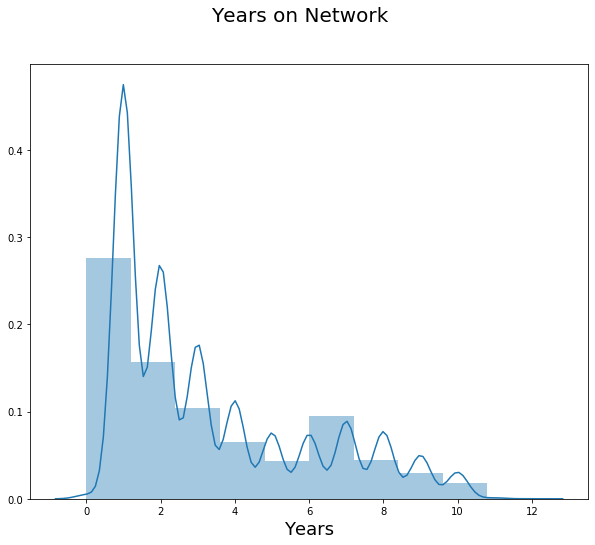

In [27]:
# let's just visualise how long users normally stay on the network
# looks like most users stay only for about 1-2 years and then move on

fig = plt.figure(figsize=(10,8))
sns.distplot((df.yr_on_network), bins = 10)
fig.suptitle('Years on Network', fontsize = 20)
plt.xlabel('Years', fontsize = 18)

In [28]:
# Total minutes of on-network and off-network usage in months 6 & 7
df['total_onnet_mou_6and7'] = df['onnet_mou_6'] + df['onnet_mou_7'] 

df['total_offnet_mou_6and7'] = df['offnet_mou_6'] + df['offnet_mou_7']

In [29]:
# checking percentage of on-network usage
# the idea is if a person is dialing more off-network numbers, it might be an indicator of churn

df['pct_onnet_usage'] = round( 100*(df['total_onnet_mou_6and7'] / (df['total_onnet_mou_6and7'] + df['total_offnet_mou_6and7'])),2)

In [30]:
# now we'll calculate the total data recharged in months 6 & 7
df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7

In [31]:
# here we will calculate total recharge amount
df['amt_data_6'] = df.total_rech_amt_6 + df.total_data_rech_6
df['amt_data_7'] = df.total_rech_amt_7 + df.total_data_rech_7
df['av_amt_data_6_7'] = (df.amt_data_6 + df.amt_data_7)/2

In [32]:
df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,sep_vbc_3g,yr_on_network,total_onnet_mou_6and7,total_offnet_mou_6and7,pct_onnet_usage,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,0.00,96.31,91.735,...,3.58,3.0,66.64,188.045,26.17,252.0,252.0,614.0,504.0,559.0
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.840,...,0.00,3.0,102.79,115.580,47.07,0.0,154.0,74.0,538.0,306.0
2,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.590,...,0.00,3.0,66.78,363.920,15.50,0.0,0.0,168.0,315.0,241.5
3,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.010,...,0.00,7.0,154.30,232.320,39.91,0.0,0.0,230.0,310.0,270.0
4,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.880,...,0.00,4.0,199.75,168.840,54.19,56.0,0.0,252.0,350.0,301.0


In [33]:
# let's find the 70th percentile for the average amount (it is Rs. 478)
print(df.av_amt_data_6_7.quantile(0.7))

478.0


In [34]:
# based on the above information, we'll extract only the high value customers for further analysis

df1 = df.loc[df.av_amt_data_6_7 >= df.av_amt_data_6_7.quantile(0.7), :]
df1 = df1.reset_index(drop=True)

In [35]:
# let's see how much data was extracted
df1.shape

(30001, 194)

In [36]:
# deleting original columns
df1 = df1.drop(['aon','onnet_mou_6', 'onnet_mou_7','offnet_mou_6','offnet_mou_7',
                'total_data_rech_6', 'total_data_rech_7','amt_data_6', 'amt_data_7','av_amt_data_6_7'], axis=1)

In [37]:
df1.shape

(30001, 184)

### Note: 
- We've managed to extract roughly 30k records
- We've also removed the original columns we used for deriving the new features (about 10 columns)

### Now, we'll move on to deriving churn

In [38]:
# first we need to calculate the incoming and outgoing usage/data consumption
df1['total_calls_mou_9'] = df1.total_ic_mou_9 + df1.total_og_mou_9

df1['total_data_mb_9'] =  df1.vol_2g_mb_9 + df1.vol_3g_mb_9

In [39]:
# We can assign 1 to 'churn' and '0' to not-churn

df1['churn'] = df1.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_data_mb_9 == 0) else 0, axis=1)

In [40]:
# let's see what percentage of high-value customers have churned
# looks like 8% of customers have churned, but about 92% people have not churned
# in a way, this data is imbalanced due to presence of majority of good customers
# so when we do cross validation later on, we should use Stratified K-Fold CV

round(100*(df1.churn.value_counts()/df1.shape[0]),2)

0    91.86
1     8.14
Name: churn, dtype: float64

In [41]:
# We will create a copy to preserve df1
df2 = df1.copy()

In [42]:
# We will delete all columns belonging to the 9th Month
df2 = df2.filter(regex='[^9]$', axis=1)
df2.shape

(30001, 140)

In [43]:
df2.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,...,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,yr_on_network,total_onnet_mou_6and7,total_offnet_mou_6and7,pct_onnet_usage,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,30.40,0.00,101.20,3.58,3.0,66.64,188.045,26.17,1
1,1069.180,1349.850,3171.480,52.29,325.91,16.23,33.49,31.64,23.74,12.59,...,0,57.74,19.38,18.74,0.00,2.0,112.52,1020.590,9.93,1
2,378.721,492.223,137.362,35.08,136.48,0.00,0.00,0.00,0.00,0.00,...,0,21.03,910.65,122.16,0.00,1.0,764.72,175.290,81.35,0
3,514.453,597.753,637.760,85.14,983.39,0.00,0.00,0.00,0.00,0.00,...,0,0.00,0.00,0.00,0.00,2.0,234.52,1654.610,12.41,0
4,74.350,193.897,366.966,33.58,205.89,0.00,0.00,0.00,0.00,0.00,...,1,40.45,51.86,0.00,0.00,2.0,99.62,174.770,36.31,0


In [44]:
df2.to_csv('df2.csv')

### Let's beging Modelling

In [45]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [46]:
df2['churn'] = pd.to_numeric(df2['churn'])
df2 = df2.drop('pct_onnet_usage',axis=1)

### Train and Test Split

In [47]:
# Devide data into train and Test split

X = df2.drop('churn', axis = 1)
y = df2.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4, stratify = y)

In [48]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21000, 138)
(21000,)
(9001, 138)
(9001,)


### PCA

In [49]:
#apply pca to train data
pca = PCA(random_state=42)

In [50]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [51]:
pca.components_

array([[ 1.23002375e-01,  1.42182690e-01,  1.36217058e-01, ...,
        -5.49947834e-05,  2.86385022e-01,  3.39019887e-01],
       [ 1.24809656e-01,  1.49549667e-01,  1.57193617e-01, ...,
         3.23785576e-05,  1.33488952e-03,  7.33078723e-02],
       [ 1.04193066e-01,  1.16597039e-01,  1.36995376e-01, ...,
         4.36849798e-04, -4.17604377e-01,  3.34337621e-01],
       ...,
       [ 0.00000000e+00,  6.33689602e-18, -1.53672998e-17, ...,
         2.23627227e-16,  9.11839573e-17,  7.21059859e-17],
       [ 0.00000000e+00, -4.68109707e-18, -2.13338149e-18, ...,
         7.50742215e-17,  3.62163569e-17,  2.89049285e-17],
       [ 0.00000000e+00,  1.72607229e-16,  1.30994954e-16, ...,
         3.08348247e-15,  4.30280038e-16, -2.19664724e-16]])

In [52]:
pca.explained_variance_ratio_

array([2.97112498e-01, 1.86328961e-01, 9.84479696e-02, 7.92372641e-02,
       5.50326835e-02, 4.72261936e-02, 2.95998318e-02, 2.67553674e-02,
       2.22051850e-02, 1.90403014e-02, 1.76371123e-02, 1.53944153e-02,
       1.17872069e-02, 9.00947640e-03, 8.04058518e-03, 7.11032337e-03,
       6.42526212e-03, 5.85722484e-03, 4.91655249e-03, 4.15125403e-03,
       3.95997907e-03, 3.79945350e-03, 3.65845895e-03, 3.20370058e-03,
       2.71056664e-03, 2.54409175e-03, 2.47158512e-03, 2.41879891e-03,
       2.13890009e-03, 1.91783554e-03, 1.83802943e-03, 1.50002210e-03,
       1.35285816e-03, 1.19308869e-03, 1.13143515e-03, 8.65654442e-04,
       7.91162659e-04, 7.47125571e-04, 6.95441294e-04, 6.61072889e-04,
       6.51293547e-04, 6.39285341e-04, 6.15417289e-04, 5.85398762e-04,
       5.68168451e-04, 5.60584259e-04, 5.42080714e-04, 4.70324991e-04,
       4.58082530e-04, 4.32904022e-04, 4.21014138e-04, 3.87635688e-04,
       3.43172950e-04, 3.12005907e-04, 2.05036100e-04, 1.98647965e-04,
      

In [53]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

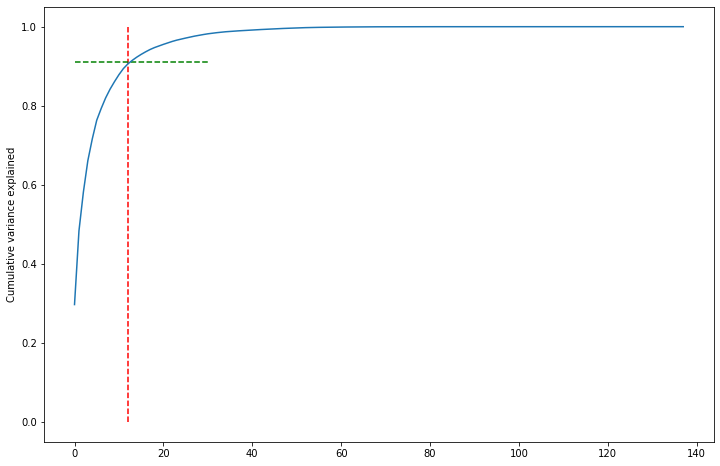

In [54]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=12, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.91, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### Performing PCA with 12 componants as it is explaining about 91% of variation in the data

In [55]:
from sklearn.decomposition import IncrementalPCA

In [56]:
pca_final = IncrementalPCA(n_components=12)
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(21000, 12)

In [57]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(12, 12)

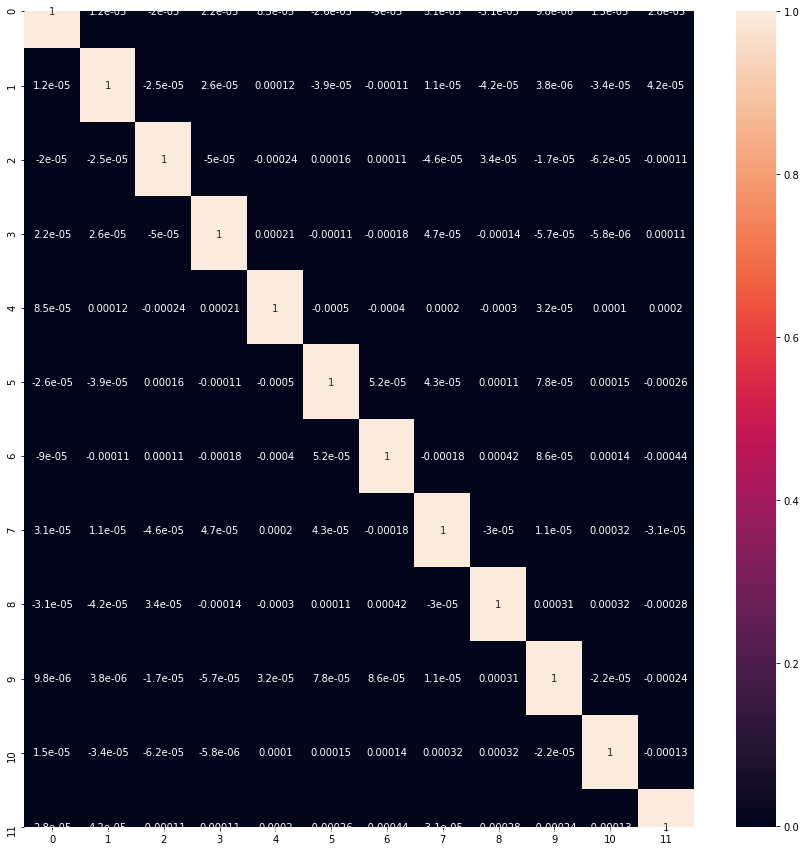

In [58]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [59]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9001, 12)

### Applying logistic regression on the data on our Principal components

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca, y_train)

###### Making predictions on test set

In [62]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [63]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.85'

### Observations:
- As can be seen our model performs well on the test data with a score of 85%, compared to training score 88%

In [64]:
from sklearn import metrics
from sklearn.pipeline import Pipeline
#pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [65]:
# create pipeline of steps in sequence to save us time running each step seperately
PCA_VARS = 12
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [66]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.6929047619047619

In [67]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5651 2618]
 [ 167  565]]
Sensitivity: 	0.77
Specificity: 	0.68
AUC:    	 0.81


## Modelling : Part 2

#### Now we will try to identify the ideal features for model building and tweak the hyper parameters of the decision tree/random forest

In [68]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [69]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   15.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                

In [70]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8787780986042221
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [71]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[8145  124]
 [ 409  323]]
Sensitivity: 	0.44
Specificity: 	0.99
AUC:    	 0.88


### Observation:
- compared to the random forest model we just created we feel the PCA & Logistic combination gives us much more better model with higher sensitivity score of 77% compared to only 46% sensitivity for the random forest

### Identifying the features responsible for churn using logistic regression

In [72]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20870
Model Family:                Binomial   Df Model:                          129
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 10 Dec 2019   Deviance:                          nan
Time:                        13:16:33   Pearson chi2:                 2.69e+07
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.3000      0.122    -10.698      0.000      -1.538      -1.062
arpu_6                     0.0004      0.000      1.341      0.180      -0.000       0.001
arpu_7                  4.307e-06      0.000      0.015      0.988      -0.001       0.001
arpu_8                     0.0010      0.000      2.569      0.010       0.000       0.002
onnet_mou_8                0.0080      0.008      0.963      0.335      -0.008       0.024
offnet_mou_8               0.0070      0.008      0.846      0.397      -0.009       0.023
roam_ic_mou_6              0.0008      0.000      1.829      0.067   -6.03e-05       0.002
roam_ic_mou_7              0.0013      0.001      2.353      0.019       0.000       0.002
roam_ic_mou_8             -0.0009      0.000     -1.856      0.063      -0.002    5.07e-05
roam_og_mou_6              0.0033      0.004      0.940      0.347      -0.004       0.010
roam_og_mou_7              0.0039      0.004      1.096      0.273      -0.003       0.011
roam_og_mou_8             -0.0068      0.008     -0.815      0.415      -0.023       0.010
loc_og_t2t_mou_6          -2.9226      6.028     -0.485      0.628     -14.738       8.892
loc_og_t2t_mou_7           2.9969      6.104      0.491      0.623      -8.967      14.961
loc_og_t2t_mou_8          26.7960      6.877      3.896      0.000      13.316      40.276
loc_og_t2m_mou_6          -2.9231      6.028     -0.485      0.628     -14.738       8.892
loc_og_t2m_mou_7           2.9965      6.104      0.491      0.624      -8.968      14.961
loc_og_t2m_mou_8          26.7974      6.877      3.896      0.000      13.318      40.277
loc_og_t2f_mou_6          -2.9247      6.029     -0.485      0.628     -14.741       8.891
loc_og_t2f_mou_7           2.9922      6.105      0.490      0.624      -8.973      14.957
loc_og_t2f_mou_8          26.8027      6.878      3.897      0.000      13.322      40.283
loc_og_t2c_mou_6          -0.0100      0.006     -1.545      0.122      -0.023       0.003
loc_og_t2c_mou_7           0.0026      0.005      0.509      0.610      -0.007       0.013
loc_og_t2c_mou_8           0.0053      0.007      0.745      0.456      -0.009       0.019
loc_og_mou_6              -0.5079      6.807     -0.075      0.941     -13.849      12.833
loc_og_mou_7             -11.7225      7.236     -1.620      0.105     -25.906       2.461
loc_og_mou_8             -20.5525      8.238     -2.495      0.013     -36.698      -4.407
std_og_t2t_mou_6           7.2782      7.306      0.996      0.319      -7.041      21.597
std_og_t2t_mou_7         -13.2456      7.502     -1.766      0.077     -27.950       1.459
std_og_t2t_mou_8          22.5377      8.811      2.558      0.011       5.269      39.806
std_og_t2m_mou_6           7.2783      7.306      0.996      0.319      -7.041  

In [73]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [74]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 12)             # running RFE with 12 variables as input
rfe = rfe.fit(X_train, y_train)

In [75]:
rfe.support_
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 74),
 ('arpu_7', False, 121),
 ('arpu_8', False, 63),
 ('onnet_mou_8', False, 57),
 ('offnet_mou_8', False, 76),
 ('roam_ic_mou_6', False, 61),
 ('roam_ic_mou_7', False, 43),
 ('roam_ic_mou_8', False, 62),
 ('roam_og_mou_6', False, 46),
 ('roam_og_mou_7', False, 39),
 ('roam_og_mou_8', False, 77),
 ('loc_og_t2t_mou_6', False, 48),
 ('loc_og_t2t_mou_7', False, 88),
 ('loc_og_t2t_mou_8', False, 19),
 ('loc_og_t2m_mou_6', False, 53),
 ('loc_og_t2m_mou_7', False, 101),
 ('loc_og_t2m_mou_8', False, 20),
 ('loc_og_t2f_mou_6', False, 91),
 ('loc_og_t2f_mou_7', False, 40),
 ('loc_og_t2f_mou_8', False, 24),
 ('loc_og_t2c_mou_6', False, 22),
 ('loc_og_t2c_mou_7', False, 44),
 ('loc_og_t2c_mou_8', False, 13),
 ('loc_og_mou_6', False, 109),
 ('loc_og_mou_7', False, 104),
 ('loc_og_mou_8', False, 83),
 ('std_og_t2t_mou_6', False, 50),
 ('std_og_t2t_mou_7', False, 115),
 ('std_og_t2t_mou_8', False, 17),
 ('std_og_t2m_mou_6', False, 49),
 ('std_og_t2m_mou_7', False, 113),
 ('std_og

In [76]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7',
       ...
       'monthly_3g_6', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_8',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
       'total_onnet_mou_6and7', 'total_offnet_mou_6and7'],
      dtype='object', length=126)

In [77]:
# assessing the model with StatsModel
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20987
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 10 Dec 2019   Deviance:                          nan
Time:                        13:41:54   Pearson chi2:                 4.03e+11
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.2785      0.060     -4.647      0.000      -0.396      -0.161
og_others_8       -1449.5704   1.55e+05     -0.009      0.993   -3.04e+05    3.02e+05
spl_ic_mou_7         -0.4305      0.346     -1.245      0.213      -1.108       0.247
spl_ic_mou_8         -3.7661      0.570     -6.608      0.000      -4.883      -2.649
total_rech_num_8     -0.1275      0.006    -20.934      0.000      -0.139      -0.116
total_rech_data_8    -0.8453      0.076    -11.194      0.000      -0.993      -0.697
monthly_2g_7         -0.5316      0.095     -5.573      0.000      -0.719      -0.345
monthly_2g_8         -1.1465      0.190     -6.048      0.000      -1.518      -0.775
sachet_2g_7           0.0605      0.015      3.954      0.000       0.030       0.090
sachet_2g_8           0.5314      0.084      6.325      0.000       0.367       0.696
monthly_3g_7         -0.2621      0.067     -3.922      0.000      -0.393      -0.131
sachet_3g_7           0.2665      0.037      7.267      0.000       0.195       0.338
yr_on_network        -0.2250      0.013    -17.125      0.000      -0.251      -0.199
=====================================================================================
"""

In [78]:
# getting predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

28122    0.031507
22066    0.152090
10150    0.000476
26262    0.224677
5320     0.072860
12479    0.018680
14392    0.008247
11495    0.039362
25855    0.002873
1781     0.035314
dtype: float64

In [79]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.03150722, 0.1520898 , 0.00047576, 0.22467692, 0.07285971,
       0.01867961, 0.0082468 , 0.03936247, 0.00287336, 0.03531437])

In [80]:
# creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.031507,28122
1,0,0.152090,22066
2,0,0.000476,10150
3,0,0.224677,26262
4,0,0.072860,5320


In [81]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
#y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0) #this is for in-module-ques'
# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.031507,28122,0
1,0,0.152090,22066,0
2,0,0.000476,10150,0
3,0,0.224677,26262,0
4,0,0.072860,5320,0


In [82]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[18903   388]
 [ 1330   379]]


In [83]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9181904761904762


In [84]:
# checking the VIF
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_rech_data_8,13.33
8,sachet_2g_8,12.60
7,sachet_2g_7,2.57
3,total_rech_num_8,1.81
6,monthly_2g_8,1.78
10,sachet_3g_7,1.69
5,monthly_2g_7,1.66
11,yr_on_network,1.58
9,monthly_3g_7,1.33
2,spl_ic_mou_8,1.06


##### There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'total_rech_data_8' has the highest VIF. So let's start by dropping that first.

In [85]:
# we are dropping two columns after having checked them in sequence. og_others_8 had a high p-value of 0.992
col = col.drop(['total_rech_data_8','og_others_8'], 1)
col

Index(['spl_ic_mou_7', 'spl_ic_mou_8', 'total_rech_num_8', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_7',
       'sachet_3g_7', 'yr_on_network'],
      dtype='object')

In [86]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20989
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4933.7
Date:                Tue, 10 Dec 2019   Deviance:                       9867.3
Time:                        13:41:55   Pearson chi2:                 7.73e+11
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3198      0.059     -5.376      0.000      -0.436      -0.203
spl_ic_mou_7        -0.4033      0.344     -1.174      0.240      -1.077       0.270
spl_ic_mou_8        -3.7770      0.571     -6.612      0.000      -4.897      -2.657
total_rech_num_8    -0.1314      0.006    -21.265      0.000      -0.144      -0.119
monthly_2g_7        -0.6053      0.095     -6.370      0.000      -0.792      -0.419
monthly_2g_8        -1.8539      0.177    -10.470      0.000      -2.201      -1.507
sachet_2g_7          0.0740      0.015      4.965      0.000       0.045       0.103
sachet_2g_8         -0.3418      0.034    -10.002      0.000      -0.409      -0.275
monthly_3g_7        -0.6855      0.062    -10.990      0.000      -0.808      -0.563
sachet_3g_7          0.0547      0.028      1.927      0.054      -0.001       0.110
yr_on_network       -0.2275      0.013    -17.446      0.000      -0.253      -0.202
====================================================================================
"""

In [87]:
# doing it all again

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.06394551, 0.23964635, 0.00744724, 0.21409056, 0.06599018,
       0.01669755, 0.00815415, 0.07838757, 0.00224517, 0.05537448])

In [88]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [89]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.063946,28122,0
1,0,0.239646,22066,0
2,0,0.007447,10150,0
3,0,0.214091,26262,0
4,0,0.065990,5320,0


In [90]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9188095238095239


##### as you can see, the accuracy hasn't dropped by much

In [91]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,sachet_2g_8,2.69
5,sachet_2g_7,2.55
2,total_rech_num_8,1.78
3,monthly_2g_7,1.65
4,monthly_2g_8,1.64
9,yr_on_network,1.58
7,monthly_3g_7,1.09
8,sachet_3g_7,1.09
1,spl_ic_mou_8,1.06
0,spl_ic_mou_7,1.01


In [92]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[19287,     4],
       [ 1701,     8]], dtype=int64)

In [93]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.9188095238095239

In [94]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [95]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

# Let us calculate specificity
TN / float(TN+FP)

# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

# positive predictive value 
print (TP / float(TP+FP))

# Negative predictive value
print (TN / float(TN+ FN))

0.00020735057798973615
0.6666666666666666
0.9189536878216124


In [96]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [97]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

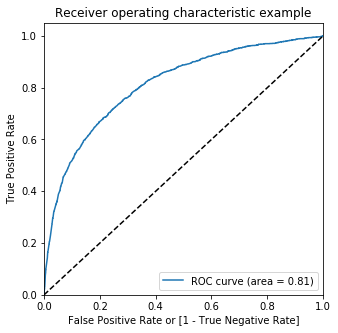

In [98]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [100]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.063946,28122,0,1,0,0,0,0,0,0,0,0,0
1,0,0.239646,22066,0,1,1,1,0,0,0,0,0,0,0
2,0,0.007447,10150,0,1,0,0,0,0,0,0,0,0,0
3,0,0.214091,26262,0,1,1,1,0,0,0,0,0,0,0
4,0,0.065990,5320,0,1,0,0,0,0,0,0,0,0,0


In [101]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.081381  1.000000  0.000000
0.1   0.1  0.731238  0.738444  0.730600
0.2   0.2  0.883571  0.476887  0.919600
0.3   0.3  0.917952  0.199532  0.981598
0.4   0.4  0.919143  0.021650  0.998652
0.5   0.5  0.918810  0.004681  0.999793
0.6   0.6  0.918714  0.001755  0.999948
0.7   0.7  0.918667  0.000585  1.000000
0.8   0.8  0.918619  0.000000  1.000000
0.9   0.9  0.918619  0.000000  1.000000


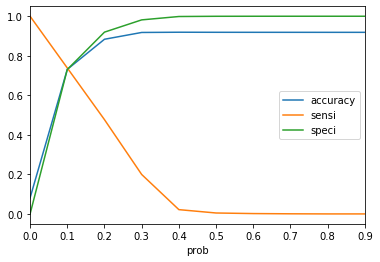

In [102]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### Hmmm, not sure about this cutoff (0.1). What to do?